In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import seaborn as sns

## ARIMA

### Order & Seasonal Order

Optimal parameters:
- p = 0
- d = 0
- q = 0
- P = 0
- D = 0
- Q = 0

In [2]:
df = pd.read_csv("../results/tuning/AutoARIMA.csv", sep=";")
print(df["LookBackWindowSize"].unique())
print(df["SeasonalPeriod"].unique())

[ 260  520 1040 2600]
[1 5]


In [3]:
lbws = 2600
sp = 5
tmp = df[(df["LookBackWindowSize"]==lbws) & (df["SeasonalPeriod"]==sp)]
for col in tmp.columns[:-3]:
    print(tmp[col].value_counts())

p
0    25
1     5
2     4
Name: count, dtype: int64
d
0    34
Name: count, dtype: int64
q
0    21
1     7
2     3
4     2
3     1
Name: count, dtype: int64
P
0    33
1     1
Name: count, dtype: int64
D
0    34
Name: count, dtype: int64
Q
0    22
1     6
2     6
Name: count, dtype: int64


### Seasonal Period & Look Back Window Size

Findings:
- SeasonalPeriod doesn't matter much, so stick to either 0 (no seasonality) or 5 (weekly seasonality).
- LookBackWindowSize matters: the longer, the better.

In [4]:
df = pd.read_csv("../results/tuning/ARIMA_general.csv", sep=";")
print(round(df.groupby("SeasonalPeriod")["F1-Score"].mean()*100).astype(int))
print()
print(round(df.groupby("LookBackWindowSize")["F1-Score"].mean()*100).astype(int))

SeasonalPeriod
0      38
5      39
22     38
65     38
130    38
Name: F1-Score, dtype: int64

LookBackWindowSize
260     37
520     38
1040    39
2600    40
Name: F1-Score, dtype: int64


### Seasonal Period of 0 vs 5

Conclusion:
- No SeasonalPeriod is needed.

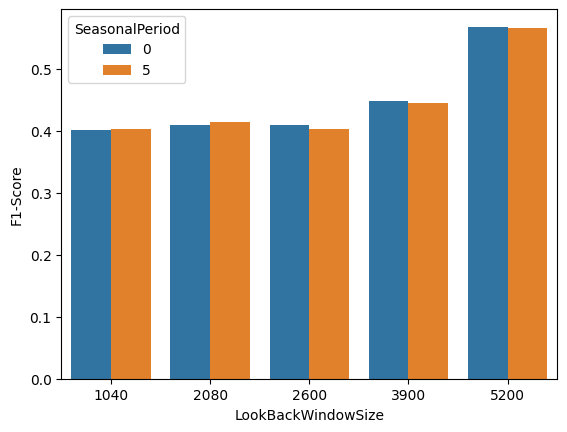

In [5]:
df = pd.read_csv("../results/tuning/ARIMA_specific.csv", sep=";")
sns.barplot(x="LookBackWindowSize", y="F1-Score", hue="SeasonalPeriod", data=df);